## DengAI DNN Notebook
This notebook is for exploring the use of DNN networks with the DengAI competition

### Environment and Data Prep

In [64]:
#Run the utils notebook
%run DengAI-Utils.ipynb

tf.random.set_seed(42)

Environment is: keras


In [65]:
#pre-process the data
df_x_train_sj, df_y_train_sj, df_x_test_sj, df_y_test_sj, df_x_valid_sj, df_y_valid_sj, df_x_pred_sj, df_y_pred_sj=pre_process_data(
    city='sj',
    train_split=1.0,
    test_split=0.0,
    valid_split=0.0,
    xy_split=0.0,
    time_series_split=True
)
#set target field
target='total_cases'

In [38]:
#alternative approach using SMOTE records to try to balance the dataset
#pre-process using SMOTE records
df_x_train_sj, df_y_train_sj, df_x_test_sj, df_y_test_sj,df_x_pred_sj=pre_process_data_smote(
    city='sj',
    train_split=0.8,
    test_split=0.2
)

In [41]:
print(df_x_train_sj.shape)
print(df_y_train_sj.shape)
print(df_x_test_sj.shape)
print(df_y_test_sj.shape)
#print(df_x_valid_sj.shape)
#print(df_y_valid_sj.shape)
print(df_x_pred_sj.shape)
#print(df_y_pred_sj.shape)
#df_x_pred_sj.to_csv('xtemp.csv')
#df_y_valid_sj.to_csv('ytemp.csv')
#df_x_train_sj.to_csv('temp.csv')

(2836, 142)
(2836,)
(709, 142)
(709,)
(310, 142)


In [52]:
#Pre-process data for iq
df_x_train_iq, df_y_train_iq, df_x_test_iq, df_y_test_iq, df_x_valid_iq, df_y_valid_iq, df_x_pred_iq, df_y_pred_iq=pre_process_data(
    city='iq',
    train_split=1.0,
    test_split=0.0,
    valid_split=0.0,
    xy_split=0.0,
    time_series_split=True
)

#set target field
target='total_cases'

In [ ]:
print(df_x_train_iq.shape)
print(df_y_train_iq.shape)
print(df_x_test_iq.shape)
print(df_y_test_iq.shape)
print(df_x_valid_iq.shape)
print(df_y_valid_iq.shape)
print(df_x_pred_iq.shape)
print(df_y_pred_iq.shape)


##### Randomly select with balanced outbreak severity
Tried creating a random dataset with 50% base outbreak and roughly 25% each of the moderate and severe outbreaks. Results were similar to the unbalanced class results (MAE was 17).

In [ ]:
'''Try randomly selecting evenly distributed classes of severity'''
##down select to even samples of severity
df_x_train_sj['total_cases']=df_y_train_sj['total_cases']
df_x_test_sj['total_cases']=df_y_test_sj['total_cases']

#create a set for each severity
df_x_train_sj=df_x_train_sj.append(df_x_test_sj,ignore_index=True)
df_base=df_x_train_sj[df_x_train_sj['outbreak_severity']==0]
df_moderate=df_x_train_sj[df_x_train_sj['outbreak_severity']==1]
df_severe=df_x_train_sj[df_x_train_sj['outbreak_severity']==2]

#sample all of the more severe outbreaks and subset of baseline and rebuild dataset
df_base=df_base.sample(frac=0.2,random_state=10)
df_sample=df_base.append(df_moderate,ignore_index=True)
df_sample=df_sample.append(df_severe,ignore_index=True)

#Drop the severity column so it's not included in training
df_sample.drop('outbreak_severity',axis=1,inplace=True)
df_sample_labels=df_sample['total_cases']
df_sample.drop('total_cases',axis=1,inplace=True)
df_x_valid_sj.drop('outbreak_severity',axis=1,inplace=True)
df_x_pred_sj.drop('outbreak_severity',axis=1,inplace=True)

#reshuffle and split the data into train and test
df_x_train_sj,df_x_test_sj,df_y_train_sj,df_y_test_sj=train_test_split(df_sample,df_sample_labels,test_size=0.2,random_state=44)
df_y_train_sj=pd.DataFrame(df_y_train_sj)
df_y_train_sj['total_cases']=df_y_train_sj
df_y_test_sj=pd.DataFrame(df_y_test_sj)
df_y_test_sj['total_cases']=df_y_test_sj

#######################################
'''Try randomly selecting evenly distributed classes of severity'''
##down select to even samples of severity
df_x_train_iq['total_cases']=df_y_train_iq['total_cases']
df_x_test_iq['total_cases']=df_y_test_iq['total_cases']

#create a set for each severity
df_x_train_iq=df_x_train_iq.append(df_x_test_iq,ignore_index=True)
df_base_iq=df_x_train_iq[df_x_train_iq['outbreak_severity']==0]
df_moderate_iq=df_x_train_iq[df_x_train_iq['outbreak_severity']==1]
df_severe_iq=df_x_train_iq[df_x_train_iq['outbreak_severity']==2]

#sample all of the more severe outbreaks and subset of baseline and rebuild dataset
df_base_iq=df_base_iq.sample(frac=0.5,random_state=10)
df_sample_iq=df_base_iq.append(df_moderate_iq,ignore_index=True)
df_sample_iq=df_sample_iq.append(df_severe_iq,ignore_index=True)

#Drop the severity column so it's not included in training
df_sample_iq.drop('outbreak_severity',axis=1,inplace=True)
df_sample_labels_iq=df_sample_iq['total_cases']
df_sample_iq.drop('total_cases',axis=1,inplace=True)
df_x_valid_iq.drop('outbreak_severity',axis=1,inplace=True)
df_x_pred_iq.drop('outbreak_severity',axis=1,inplace=True)

#reshuffle and split the data into train and test
df_x_train_iq,df_x_test_iq,df_y_train_iq,df_y_test_iq=train_test_split(df_sample_iq,df_sample_labels_iq,test_size=0.2,random_state=44)
df_y_train_iq=pd.DataFrame(df_y_train_iq)
df_y_train_iq['total_cases']=df_y_train_iq
df_y_test_iq=pd.DataFrame(df_y_test_iq)
df_y_test_iq['total_cases']=df_y_test_iq


**DNN with GridSearch**

In [ ]:
#Start timer
from datetime import datetime
s_time=datetime.now()

from keras.optimizers import RMSprop

#define a keras model builder
def build_model(n_hidden=1,n_neurons=80,learning_rate=0.01,input_shape=0,activation='selu',dropout=0,optimizer='sgd',kernel_initializer=None):
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    #for layer in range(n_hidden):
    #    model.add(keras.layers.Dense(n_neurons,activation=activation,kernel_initializer=kernel_initializer))
    model.add(keras.layers.Dense(n_neurons,activation=activation))
    tf.keras.layers.Dropout(0.5)
    model.add(keras.layers.Dense(n_neurons/4,activation=activation))
    model.add(keras.layers.Dense(1))
    optimizer=optimizer(lr=learning_rate)
    model.compile(loss='mae',metrics=['mae'],optimizer=optimizer)
    
    return model

#Wrap with sci-kit wrapper to enable fit, predict, score, etc
input_sj=len(df_x_train_sj.columns)
keras_reg_sj=keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model,input_shape=(input_sj))

#Create callbacks
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=10, min_lr=1e-10, verbose=1, mode="max")
early_stop=keras.callbacks.EarlyStopping(patience=20)

#Build and fit Fit model
n_neurons=80
activation='selu'
model_sj=keras.models.Sequential()
model_sj.add(keras.layers.InputLayer(input_shape=input_sj))
model_sj.add(keras.layers.Dense(n_neurons,activation=activation))
model_sj.add(tf.keras.layers.Dropout(0.5))
model_sj.add(keras.layers.Dense(n_neurons/4,activation=activation))
model_sj.add(keras.layers.Dense(1))
opt=tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name='RMSprop')
optimizer=opt
model_sj.compile(loss='mae',metrics=['mae'],optimizer=opt)

model_sj.fit(df_x_train_sj, df_y_train_sj[target],batch_size=16,epochs=500,verbose=1,shuffle=True,
           validation_data=(df_x_test_sj,df_y_test_sj[target]),
           callbacks=[reduce_lr])

'''
#get needed libraries for grid search and eval
from scipy.stats import reciprocal
from sklearn.model_selection import GridSearchCV

params={
    'n_hidden': [2],
    'kernel_initializer':[None],
    'n_neurons': [80],
    'learning_rate': [0.01],
    'activation':['selu'],
    'dropout': [0],
    'optimizer':[RMSprop]
}

#Create callbacks
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=10, min_lr=1e-10, verbose=0, mode="max")
early_stop=keras.callbacks.EarlyStopping(patience=20)

#Grid search for SJ
grid_sj=GridSearchCV(keras_reg_sj,params,cv=3,return_train_score=True)
grid_sj.fit(df_x_train_sj, df_y_train_sj[target],epochs=50,verbose=0,shuffle=True,
           validation_data=(df_x_test_sj,df_y_test_sj[target]),
           callbacks=[reduce_lr])

#grid seach for IQ
#grid_iq=GridSearchCV(keras_reg_iq,params,cv=3,return_train_score=True)
#grid_iq.fit(df_x_train_iq, df_y_train_iq[target],epochs=200,verbose=0,
#           validation_data=(df_x_test_iq,df_y_test_iq[target]),
#           callbacks=[keras.callbacks.EarlyStopping(patience=10)])


#Evaluate results
#Test MAE
y_pred_sj=grid_sj.predict(df_x_test_sj)
y_pred_iq=grid_iq.predict(df_x_test_iq)
y_pred_combined=np.append(y_pred_sj,y_pred_iq)
y_pred_combined=np.where(y_pred_combined>0,y_pred_combined,0) #remove negative predictions
y_target_combined=np.append(df_y_test_sj[target],df_y_test_iq[target])
print('MAE of SJ: '+ str(mean_absolute_error(df_y_test_sj[target],y_pred_sj)))
print('MAE of IQ: '+ str(mean_absolute_error(df_y_test_iq[target],y_pred_iq)))
print('MAE of Combined: ' + str(mean_absolute_error(y_target_combined,y_pred_combined)))
print('-'*25)
#best model
print('grid_sj params:' + str(grid_sj.best_params_))
print('grid_sj best score: '+str(grid_sj.best_score_))
print('grid_iq params:' + str(grid_iq.best_params_))
print('grid_iq best score: '+str(grid_iq.best_score_))
model_sj=grid_sj.best_estimator_.model
model_iq=grid_iq.best_estimator_.model
'''
print('-'*25)
#end timer
e_time=datetime.now()
exec_time=e_time-s_time
print('Execution time:' + str(exec_time))

In [ ]:
#Test MAE
y_pred_sj=grid_sj.predict(df_x_test_sj)
print('MAE of SJ: '+ str(mean_absolute_error(df_y_test_sj[target],y_pred_sj)))
print('-'*25)
#best model
print('grid_sj params:' + str(grid_sj.best_params_))
print('grid_sj best score: '+str(grid_sj.best_score_))

model_sj=grid_sj.best_estimator_.model

In [ ]:

y_hat_sj=model_sj.predict(df_x_valid_sj)
y_hat_sj=y_hat_sj[:,-1]
for i in range(len(y_hat_sj)): y_hat_sj[i]=abs(int(y_hat_sj[i]))
print(y_hat_sj)

#Print the MAE for predictions and targets from generated holdout
print('MAE for y_hat and y_valid:' + str(mean_absolute_error(y_hat_sj,df_y_valid_sj['total_cases'])))

#Print the predicted amounts against the targets
df_pred=pd.DataFrame(data=y_hat_sj)
df_pred['week']=range(1,len(y_hat_sj)+1)
df_pred['y_hat']=df_pred[0]
df_targets=df_y_valid_sj['total_cases'].copy()
df_targets=df_targets.reset_index(drop=True)
df_pred['targets']=df_targets
df_pred=df_pred.iloc[:,1:]

sns.lineplot(data=df_pred,x='week',y='y_hat',legend='brief',label='y_hat')
sns.lineplot(data=df_pred,x='week',y='targets',legend='brief',label='target')

In [ ]:
'''Create the submission file'''
#Use the trained model to make predictions on the holdout set
y_pred_sj=grid_sj.predict(df_x_pred_sj)
y_pred_iq=grid_iq.predict(df_x_pred_iq)

#Create the holdout file
create_submit_file(y_pred_sj,y_pred_iq)

#### DNN Model
##### SJ Model

In [66]:
#Define model
def build_model(optimizer=None,n_units=80,input_shape=df_x_train_sj.shape[1]):
  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(n_units, activation='selu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(n_units, activation='selu'),
    tf.keras.layers.Dense(1)
  ])

  if not optimizer:
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.9999, amsgrad=False)

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:

# Train the Model.
batch_size = 16
buffer_size = 500
eval_interval = 200
epochs = 50

#Add a learning rate callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=10, min_lr=1e-10, verbose=1, mode="max")

#Train the model with shuffled batches
train_sj_data_single = tf.data.Dataset.from_tensor_slices((df_x_train_sj, df_y_train_sj[target]))
#train_sj_data_single = tf.data.Dataset.from_tensor_slices((df_x_train_sj, df_y_train_sj))
train_sj_data_single = train_sj_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

#define optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,name='RMSprop')

#Build and fit the model
sj_model = build_model(optimizer=opt, n_units=80)
history = sj_model.fit(
    train_sj_data_single,
    epochs=epochs, 
    steps_per_epoch=eval_interval,
    verbose=1,
    callbacks=[reduce_lr])


In [ ]:
np_mae_scores=np.array(mae_scores)
sns.lineplot(data=mae_scores)

print('Average MAE Score: ' + str(np.mean(np_mae_scores)))
print('Max MAE score: ' + str(np.max(np_mae_scores)) + ' Percent of mean: ' + str(np.max(np_mae_scores)/np.mean(np_mae_scores)))
print('Min MAE score: ' + str(np.min(np_mae_scores)) + ' Percent of mean: ' + str(np.min(np_mae_scores)/np.mean(np_mae_scores)))

[202 230 239 226 184 149 121 104  83  78  91  63  49  48  47  33  39  50
  38  28  28  30  31  16  21  25  28  30  41  49  72  86]
MAE for y_hat and y_valid:58.15625


<AxesSubplot:xlabel='week', ylabel='y_hat'>

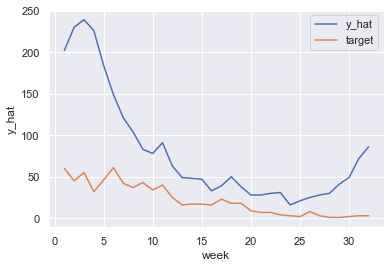

In [807]:
#Run the predictions on the validation set
y_hat_sj=sj_model.predict(df_x_valid_sj)
y_hat_sj=y_hat_sj[:,-1]
y_hat_sj=y_hat_sj.astype(int)
y_hat_sj=np.where(y_hat_sj>0,y_hat_sj,0)

print(y_hat_sj)

#Print the MAE for predictions and targets from generated holdout
print('MAE for y_hat and y_valid:' + str(mean_absolute_error(y_hat_sj,df_y_valid_sj[target])))

#Print the predicted amounts against the targets
df_pred=pd.DataFrame(data=y_hat_sj)
df_pred['week']=range(1,len(y_hat_sj)+1)
df_pred['y_hat']=df_pred[0]
df_targets=df_y_valid_sj['total_cases'].copy()
df_targets=df_targets.reset_index(drop=True)
df_pred['targets']=df_targets
df_pred=df_pred.iloc[:,1:]

sns.lineplot(data=df_pred,x='week',y='y_hat',legend='brief',label='y_hat')
sns.lineplot(data=df_pred,x='week',y='targets',legend='brief',label='target')

In [68]:
#Create submission set for sj
sj_test_set = tf.data.Dataset.from_tensor_slices((df_x_pred_sj,df_y_pred_sj)).batch(len(df_y_pred_sj))
sj_pred = []
for x, y in sj_test_set.take(1):
    predictions = sj_model.predict(x)
    sj_pred = predictions.flatten()
sj_pred=sj_pred.astype(int)
sj_pred=np.where(sj_pred>0,sj_pred,0)
print(len(sj_pred))

260


##### IQ Model

In [ ]:
# Train the Model.
batch_size = 16
buffer_size = 1000
eval_interval = 200
epochs = 4

#Add learning rate callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=10, min_lr=1e-6, verbose=1, mode="max")

#Set up repeated copies of shuffled data
train_iq_data_single = tf.data.Dataset.from_tensor_slices((df_x_train_iq, df_y_train_iq[target]))
train_iq_data_single = train_iq_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

#Set up an optimizer for the model
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)

#Create and fit the model
iq_model = build_model(optimizer=opt,n_units=100,input_shape=df_x_train_iq.shape[1])
history = iq_model.fit(
    train_iq_data_single,
    epochs=epochs, 
    steps_per_epoch=eval_interval,
    verbose=1,
    callbacks=[reduce_lr])

In [756]:
#Verify training run with validation set
iq_test_set = tf.data.Dataset.from_tensor_slices((df_x_valid_iq,df_y_valid_iq['total_cases'])).batch(len(df_y_valid_iq['total_cases']))
iq_pred = []
for x, y in iq_test_set.take(1):
    predictions = iq_model.predict(x)
    iq_pred = predictions.flatten()
iq_pred=iq_pred.astype(int)
iq_pred=np.where(iq_pred>0,iq_pred,0)
print(len(predictions.flatten()))

19


MAE for y_hat and y_valid:3.473684210526316


<AxesSubplot:xlabel='week', ylabel='y_hat'>

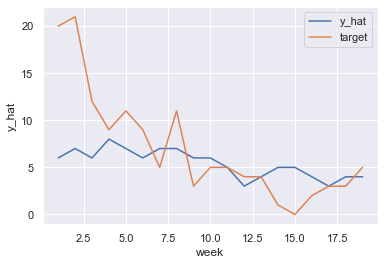

In [757]:
#Print the MAE for predictions and targets from generated holdout
print('MAE for y_hat and y_valid:' + str(mean_absolute_error(iq_pred,df_y_valid_iq['total_cases'])))

#Print the predicted amounts against the targets
df_pred=pd.DataFrame(data=iq_pred)
df_pred['week']=range(1,len(iq_pred)+1)
df_pred['y_hat']=df_pred[0]
df_targets=df_y_valid_iq['total_cases'].copy()
df_targets=df_targets.reset_index(drop=True)
df_pred['targets']=df_targets
df_pred=df_pred.iloc[:,1:]

sns.lineplot(data=df_pred,x='week',y='y_hat',legend='brief',label='y_hat')
sns.lineplot(data=df_pred,x='week',y='targets',legend='brief',label='target')

In [92]:
#Create the submission data for IQ
iq_test_set = tf.data.Dataset.from_tensor_slices((df_x_pred_iq,df_y_pred_iq)).batch(len(df_y_pred_iq))
iq_pred = []
for x, y in iq_test_set.take(1):
    predictions = iq_model.predict(x)
    iq_pred = predictions.flatten()
iq_pred=iq_pred.astype(int)
iq_pred=np.where(iq_pred>0,iq_pred,0)
print(len(predictions.flatten()))

156


In [93]:
#Create the submission file
create_submit_file(sj_pred,iq_pred)